# Homework: scikit-image

## Counting objects

In class, we saw how to count the number of objects in a microscopy image.  Here, we will repeat that exercise, but make use of some of the algorithms in `scikit-image` to segment the image, and then to determine properties of the resulting objects.

As input, use the image `skimage.data.coins`.  Segment the image, and then calculate the area and eccentricity of each coin.

There are various ways to do this.  One would be:

1. Equalize the input image (see `skimage.exposure`)
2. Threshold the image (`skimage.filters.otsu`)
3. Remove objects touching the boundary (`skimage.segmentation.clear_border`)
4. Apply morphological closing (`skimage.morphology.closing`)
5. Remove small objects (`skimage.measure.regionprops`).
   Visualize the results if you want with `skimage.color.label2rgb`.
7. Calculate the area and eccentricity of each coin, and display the
   original image with this information on it (`matplotlib.pyplot.text` or `matplotlib.pyplot.annotate`)

## Panorama stitching

One of the scikit-image tutorials shows [how to do panorama stitching](https://github.com/scikit-image/skimage-tutorials/blob/master/lectures/solutions/adv3_panorama-stitching-solution.ipynb).

Take 3 or 4 overlapping photos of your own, and use the procedure described to stitch your own panorama.

## Extra: Image Stacking

Reprocess one of the datasets from http://www.rawastrodata.com/.  See http://www.rawastrodata.com/pages/typesofimages.html for a description of the different kind of images.

## Counting objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
%matplotlib inline

from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.morphology import watershed


I follow the scikit-image tutorial on segmentation:

http://scikit-image.org/docs/stable/user_guide/tutorial_segmentation.html

In [2]:
# import coin image
coins = data.coins()

# use amplitude of gradient to construct an elevation map
elevation_map = sobel(coins)

# choose markers from extreme parts of histogram of grey value
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 160] = 2

# use watershed to obtain segmentation
segmentation = watershed(elevation_map, markers)

# fill holes in segments
segmentation = ndi.binary_fill_holes(segmentation - 1)

# label coins
labeled_coins, _ = ndi.label(segmentation)

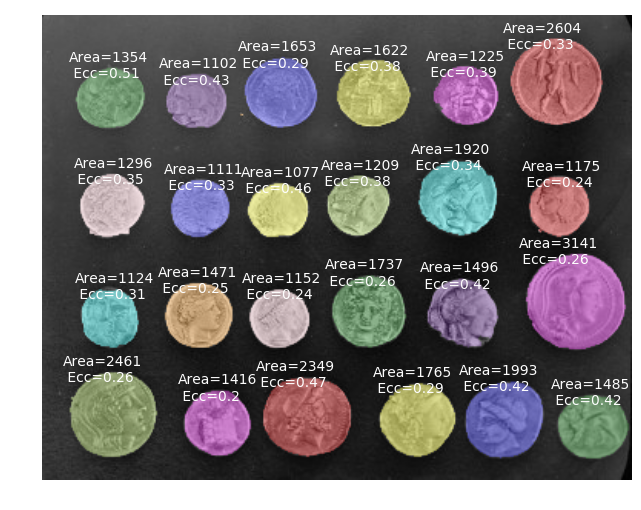

In [3]:
# overlay coins with color labels
coin_label_overlay = label2rgb(labeled_coins-1, image=coins)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.imshow(coin_label_overlay)
ax.axis('off');
for region in regionprops(labeled_coins):
    # skip small areas
    if region.area > 100:
        minr, minc, maxr, maxc = region.bbox
        annot = "Area={0}\n Ecc={1:.2g}".format(region.area, region.eccentricity)
        ax.text(minc-5, minr+5, annot, color="white")

## Panorama stitching

See `panoroma-stitching.ipynb` for detail. 

<img src='images/pano-output.png' >